In [1]:
#匯入套件
from tensorflow.keras.datasets import mnist #用來下載mnist資料集
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#下載資料集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # 將Mnist資料集分別指派到4個變數中

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#檢視資料集的型別
print(type(train_images),type(train_labels))
print(type(test_images),type(test_labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
#檢視資料集的shape
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

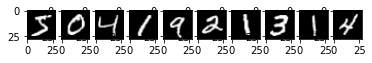

In [6]:
#檢視訓練資料
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], 'gray')
plt.show()

In [7]:
#檢視訓練樣本對應的標籤 (正確答案)
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [8]:
#預處理
train_images = train_images.reshape((train_images.shape[0], 784))
test_images = test_images.reshape((test_images.shape[0], 784))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [9]:
print(train_labels[0])
print(test_labels[0])

#進行標籤資料的 One-hot Encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[0])
print(test_labels[0])

#檢視經過預處理後標籤資料的 shape
print(train_labels.shape)
print(test_labels.shape)

5
7
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(60000, 10)
(10000, 10)


In [10]:
# 建構模型
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,))) # 輸入層
model.add(Dense(128, activation='sigmoid')) # 隱藏層
model.add(Dropout(rate=0.5)) # Dropout
model.add(Dense(10, activation='softmax')) # 輸出層

In [11]:
#編譯
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['acc'])

In [12]:
# 訓練
history = model.fit(train_images, train_labels, batch_size=500,
    epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
96/96 [==============================] - 3s 7ms/step - loss: 2.0871 - acc: 0.2812 - val_loss: 1.0120 - val_acc: 0.8278
Epoch 2/5
96/96 [==============================] - 0s 3ms/step - loss: 1.0539 - acc: 0.6997 - val_loss: 0.6049 - val_acc: 0.8783
Epoch 3/5
96/96 [==============================] - 0s 3ms/step - loss: 0.7261 - acc: 0.7981 - val_loss: 0.4517 - val_acc: 0.8938
Epoch 4/5
96/96 [==============================] - 0s 3ms/step - loss: 0.5805 - acc: 0.8370 - val_loss: 0.3800 - val_acc: 0.9051
Epoch 5/5
96/96 [==============================] - 0s 3ms/step - loss: 0.4921 - acc: 0.8653 - val_loss: 0.3340 - val_acc: 0.9127


In [13]:
print(history.history)

{'loss': [1.7317434549331665, 0.9541378617286682, 0.680783212184906, 0.5623398423194885, 0.4832528531551361], 'acc': [0.429729163646698, 0.7279791831970215, 0.8111458420753479, 0.843416690826416, 0.8662499785423279], 'val_loss': [1.01201331615448, 0.6048892140388489, 0.45167315006256104, 0.38001224398612976, 0.3339863121509552], 'val_acc': [0.827750027179718, 0.878250002861023, 0.893833339214325, 0.9050833582878113, 0.9126666784286499]}


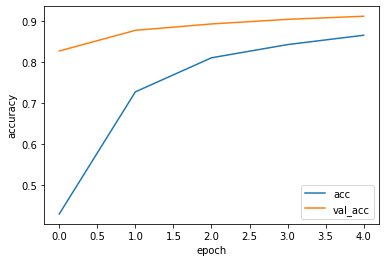

In [14]:
# 繪製圖形
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [15]:
# 評估
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc ))

313/313 [==============================] - 1s 2ms/step - loss: 0.3361 - acc: 0.9130
loss: 0.336
acc: 0.913


In [16]:
test_predictions = model.predict(test_images[0:1])
print([round(i,4) for i in test_predictions[0].tolist()])

# 顯示預測結果的標籤
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions[0])

[0.0005, 0.0004, 0.0017, 0.0023, 0.0004, 0.0005, 0.0, 0.9798, 0.0005, 0.0138]
7


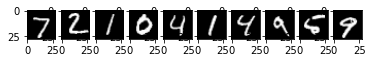

[7 2 1 0 4 1 4 9 6 9]


In [20]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i].reshape((28, 28)), 'gray')
plt.show()

test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)

print(test_predictions)